# Проект: Исследование стартапов

- Автор: Шишкин Глеб Андреевич
- Дата: 06.02.2025

## Введение

### Цели и задачи проекта

<font color='#000000'> **Цель:** Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

**Задачи:**
- Загрузить данные и познакомиться с их содержимым.
- Провести предобработку данных.
- Провести исследовательский анализ данных:
- Изучить данные более детально;
- Изучить взаимосвязь данных.
- Сформулировать выводы по проведённому анализу.</font>


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv



### 1.1. Вывод общей информации, исправление названия столбцов


* Загрузите все данные по проекту.


* Проверьте названия столбцов.


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Установим библиотеку phik
!pip install phik
# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [2]:
# Выгружаем данные в переменные acquisition_df, company_and_rounds_df, degrees_df, education_df, fund_df, investment_df, people_df
acquisition_df = pd.read_csv('acquisition.csv')
company_and_rounds_df = pd.read_csv('company_and_rounds.csv')
degrees_df = pd.read_csv('degrees.csv')
education_df = pd.read_csv('education.csv')
fund_df = pd.read_csv('fund.csv')
investment_df = pd.read_csv('investment.csv')
people_df = pd.read_csv('people.csv')

Познакомимся с данными датасетов и выведем первые строки методом head(), а информацию о датафрейме методом info():

In [3]:
# Выводим первые строки о датафрейме acquisition_df на экран
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
# Выводим информацию о датафрейме acquisition_df на экран
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет acquisition.csv содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний.

После первичного анализа данных можно сделать следующие выводы:
Названия столбцов в нижнем регистре и не требуют приведения к snake case. Пропуски наблюдаются в столбцах term_code и acquired_at. Однако следует проверить и другие столбцы.

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Возможно необходимо изменить тип данных для столбца acquired_at и приветсти его к типу datetime


In [5]:
# Выводим первые строки о датафрейме company_and_rounds_df на экран
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме company_and_rounds_df на экран
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет company_and_rounds.csv содержит 22 столбцf и 217774 строк, в которых представлена информация о компаниях и раундах финансирования.

После первичного анализа данных можно сделать следующие выводы: Названия столбцов не приведены к snake case. Пропуски наблюдаются во всех столбцах.

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Необходимо изменить тип данных для столбцов: company  ID - int64, founded  at / funded  at / closed  at- datetime, investment  rounds - int64, milestones - int64, funding  round  id - int64, company  id (возможно дубликат и придется удалить) - int64, participants - int64, is  first  round / is  last  round  - int8

In [7]:
# Выводим первые строки о датафрейме degrees_df на экран
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [8]:
# Выводим информацию о датафрейме degrees_df на экран
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет degrees.csv содержит 4 столбца и 109610 строк, в которых представлена информация о типе образования сотрудника.

После первичного анализа данных можно сделать следующие выводы: Названия столбцов приведены к snake case. Пропуски наблюдаются в столбцах: degree_type и subject.

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Типы данных корректные.

In [9]:
# Выводим первые строки о датафрейме education_df на экран
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [10]:
# Выводим информацию о датафрейме education_df на экран
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет education.csv содержит 4 столбца и 109610 строк, в которых представлена информация об образовании сотрудника

После первичного анализа данных можно сделать следующие выводы: Названия столбцов приведены к snake case. Пропуски наблюдаются в столбцах: instituition и graduated_at.

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Возможно понадобится привести данные столбца graduated_at к datetime.

In [11]:
# Выводим первые строки о датафрейме fund_df на экран
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [12]:
# Выводим информацию о датафрейме fund_df на экран
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Датасет fund.csv содержит 9 столбцов и 11652 строки, в которых представлена информация о фондах.

После первичного анализа данных можно сделать следующие выводы: Названия столбцов приведены к snake case. Пропуски наблюдаются в столбцах: name, founded_at,  domain, network_username и country_code.

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Возможно понадобится привести данные столбца founded_at к datetime.

In [13]:
# Выводим первые строки о датафрейме investment_df на экран
investment_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [14]:
# Выводим информацию о датафрейме investment_df на экран
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Датасет investment.csv содержит 4 столбца и 61403 строки, в которых представлена информация о фондах.

После первичного анализа данных можно сделать следующие выводы: Названия столбцов приведены к snake case. Пропуски не наблюдаются.

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Типы данных корректные.

In [15]:
# Выводим первые строки о датафрейме people_df на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [16]:
# Выводим информацию о датафрейме people_df на экран
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет people.csv содержит 5 столбцов и 226709 строки, в которых представлена информация о сотрудниках.

После первичного анализа данных можно сделать следующие выводы: Названия столбцов приведены к snake case. Пропуски наблюдаются в во всех столбцах, кроме id.

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Данные столбца company_id стоит привести к типу int64.

### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.


* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [17]:
# датафрейм company_and_rounds_df содержит столбцы с одинаковым названием. 
# Для удобства дальнейшего анализа заменим название столбца company  id на 'company_id2'
company_and_rounds_df = company_and_rounds_df.rename(columns = {'company  id':'company_id2'})

In [18]:
# Приведем названия столбцов company_and_rounds_df к snake case
def clean_column_name(column_name):
    # Удаляем лишние пробелы в начале и конце
    column_name = column_name.strip()
    # Заменяем множественные пробелы на один
    column_name = ' '.join(column_name.split())
    # Заменяем оставшиеся пробелы на _
    column_name = column_name.replace(' ', '_')
    # Приводим к нижнему регистру
    return column_name.lower()

# Применяем функцию к названиям столбцов
company_and_rounds_df.columns = [clean_column_name(col) for col in company_and_rounds_df.columns]

In [19]:
# Приведем к типу datetime столбцы содержащие дату во всех датафремах
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'])
company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at'])
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'])
company_and_rounds_df['closed_at'] = pd.to_datetime(company_and_rounds_df['closed_at'])
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at']) 
fund_df['founded_at'] = pd.to_datetime(fund_df['founded_at']) 

Данные в датафреймах имеют значительное количество пропусков, некоторые столбы с данными дублируются в датафремах. Более точно о качестве полученных данных можно будет сказаь после обработки пропусков, дубликатов и нормализации данных.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [20]:
# Преобразуем дату в год 
company_and_rounds_df['funded_year'] = pd.to_datetime(company_and_rounds_df['funded_at']).dt.year

pivot_df = company_and_rounds_df.groupby('funded_year').agg(
    typical_funding=('raised_amount', 'median'),  # Медианный размер раунда
    total_rounds=('raised_amount', 'count')     # Количество раундов
).reset_index()

filtered_df = pivot_df[pivot_df['total_rounds'] > 50]
filtered_df

,funded_year,typical_funding,total_rounds
15,1999.0,2000000.0,76
16,2000.0,4200000.0,125
17,2001.0,3000000.0,96
18,2002.0,4200000.0,116
19,2003.0,3000000.0,159
20,2004.0,5000000.0,291
21,2005.0,5500000.0,1633
22,2006.0,5000000.0,2436
23,2007.0,3973320.0,3279
24,2008.0,3110000.0,3774


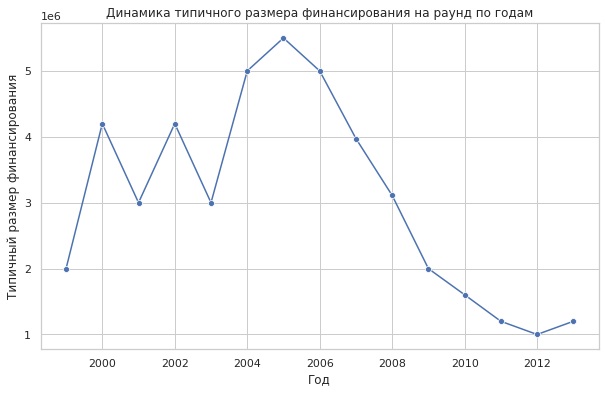

In [21]:
sns.set(style="whitegrid")

# Создаем график
plt.figure(figsize=(10, 6))  # Размер графика
sns.lineplot(data=filtered_df, x='funded_year', y='typical_funding', marker='o', color='b')

# Добавляем подписи
plt.title('Динамика типичного размера финансирования на раунд по годам')
plt.xlabel('Год')
plt.ylabel('Типичный размер финансирования')

# Отображаем сетку
plt.grid(True)

# Показываем график
plt.show()

Вывод:
Типичный размер собранных в рамках одного раунда средств был максимален в 2005 году.
Наблюдается тендеция к увеличению количества раундов. В 2013 году количество раундов составило - 11072 раунда. 
Количество средств выделяемых в рамках каждого раунда выросло, по сравнению с показателем 2012 года. По состоянию на 2013 год наблюдается тендеция к увеличению количества выделяемых в рамках каждого раунда средств.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [23]:
people_df = people_df.rename(columns = {'id':'employee_id'})
df_merged = pd.merge(people_df, education_df, left_on = 'employee_id', right_on = 'person_id', how = 'left')
df_merged

,employee_id,first_name,last_name,company_id,network_username,id,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT


In [24]:
df_merged['education_filled'] = df_merged['graduated_at'].notna()
df_merged.sort_values(by = 'company_id').head(12)

,employee_id,first_name,last_name,company_id,network_username,id,person_id,instituition,graduated_at,education_filled
191140,3,Kevin,Flaherty,1.0,NaN,707.0,3.0,Indiana University,NaT,False
191139,3,Kevin,Flaherty,1.0,NaN,706.0,3.0,Washington University in St Louis,NaT,False
4393,104800,Alex,Weinstein,1.0,alexweinstein,NaN,NaN,NaN,NaT,False
265175,9729,Bharath,Balasubramanian,2.0,spinfree,594.0,9729.0,Tamilnadu College of engineering,1998-01-01,True
230712,6456,Sridhar,Vembu,3.0,NaN,43581.0,6456.0,"Indian Institute of Technology, Madras",1989-01-01,True
230713,6456,Sridhar,Vembu,3.0,NaN,43582.0,6456.0,Princeton University,NaT,False
214177,5,Ian,Wenig,3.0,NaN,47871.0,5.0,McGill University,1986-01-01,True
202670,4,Raju,Vegesna,3.0,NaN,NaN,NaN,NaN,NaT,False
214176,5,Ian,Wenig,3.0,NaN,47870.0,5.0,The Aji Network,2005-01-01,True
192123,30923,Bob,Buch,4.0,bobbuch,58868.0,30923.0,"University of California, Los Angeles (UCLA)",NaT,False


In [25]:
df_unique = df_merged.drop_duplicates(subset=['employee_id'])

# Группируем по company_id и считаем количество сотрудников без образования
df_grouped = df_unique.groupby('company_id').agg(
    total_employees=('employee_id', 'size'),  # Общее количество сотрудников в компании
    no_education_count=('education_filled', lambda x: (x == False).sum())  # Количество сотрудников без образования
).reset_index()

# Рассчитываем долю сотрудников без образования
df_grouped['no_education_ratio'] = df_grouped['no_education_count'] / df_grouped['total_employees']

# Выводим результат
display(df_grouped)

,company_id,total_employees,no_education_count,no_education_ratio
0,1.0,2,2,1.000000
1,2.0,1,0,0.000000
2,3.0,3,1,0.333333
3,4.0,13,3,0.230769
4,5.0,61,37,0.606557
...,...,...,...,...
22916,285897.0,2,1,0.500000
22917,285953.0,1,1,1.000000
22918,285972.0,2,2,1.000000
22919,285996.0,1,1,1.000000


In [27]:
# Создаем категории для размера компаний
bins = [0, 1, 2, 3, 5, 10, 25, float('inf')]  # Границы для категорий
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']  # Названия категорий

# Добавляем столбец с категориями размера компании
df_grouped['company_size'] = pd.cut(df_grouped['total_employees'], bins=bins, labels=labels)

# Группируем по категориям и считаем среднюю долю сотрудников без образования
pivot_table = df_grouped.groupby('company_size')['no_education_ratio'].mean().reset_index()

# Переименуем столбцы для наглядности
pivot_table.columns = ['Размер компании', 'Средняя доля сотрудников без образования']

# Выводим результат
display(pivot_table)

,Размер компании,Средняя доля сотрудников без образования
0,1,0.572201
1,2,0.597268
2,3,0.636989
3,4-5,0.655968
4,6-10,0.701020
5,11-25,0.688615
6,26+,0.572953


В качестве маркера наличия образования мы взяли столбец graduated_at (дата получения образования). В идеале стоило бы уточнить у заказчика, что он понимает под наличием образования (возможно допускается наличие неоконченного, т.е. наличие данных о названии учебного заведения). Для стартапов наиболее характерно малое количество сотрудников. Исходя из полученных данных наиболее часто встречаются значения до 10 человек. Чаще всего встречаются стартапы с 1 сотрудником - 18116 компаний. Для удобства анализа разобъем данные на 6 групп: '1', '2', '3', '4-5', '6-10', '11-25', '26+'

Вывод:
Проведя анализ данных можно сделать вывод, что полнота сведений о сотрудниках (в нашем случае, наличие данных об образовании) не зависит от размера компании. Средняя доля сотрудников без образования (отсутствие данных о дате получения образования) распределена почти равномерно -  60-70%.

In [28]:
unique_ids = df_merged['company_id'].unique()
number_of_unique_rows = len(unique_ids)
number_of_unique_rows

22923

Для увеличения полноты данных об образовании можно присоединить датафрейм `degrees` с предварительной обработкой столбца `object_id`. В этом столбце содержится идентификатор сотрудника, который отличается от подобного идентификатора в других таблицах наличием префикса `p:`. После удаления префикса возможно присоединение.

In [29]:
degrees_df['object_id'] = degrees_df['object_id'].replace({'p:': ''}, regex=True)
degrees_df['object_id'] = degrees_df['object_id'].astype('int64')
degrees_df.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Согласно описанию, данные network_username содержат абсолютно разную информацию в датасетах (ник компании в сети, ник сотрудника в социальных сетях, ник фонда в сети).
Посмотрим, Сколько мы получил дополнительной информации от этого обьединения. Для этого построим диаграмму Венна на основе столбца network_username для датафреймов (people_df и company_and_rounds_df) и (fund_df и company_and_rounds_df).

In [30]:
# Установим и импортируем библиотеки
!pip install matplotlib-venn -q
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

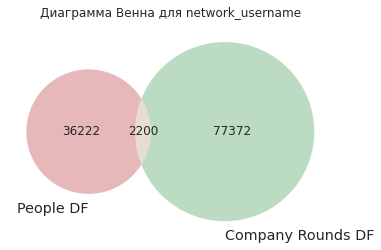

In [31]:
# Для построения диаграммы Венна преобразуем столбцы network_username в множества
set_people = set(people_df['network_username'])
set_company = set(company_and_rounds_df['network_username'])
# Создаем диаграмму Венна
venn2([set_people, set_company], ('People DF', 'Company Rounds DF'))

# Отображаем диаграмму
plt.title("Диаграмма Венна для network_username")
plt.show()

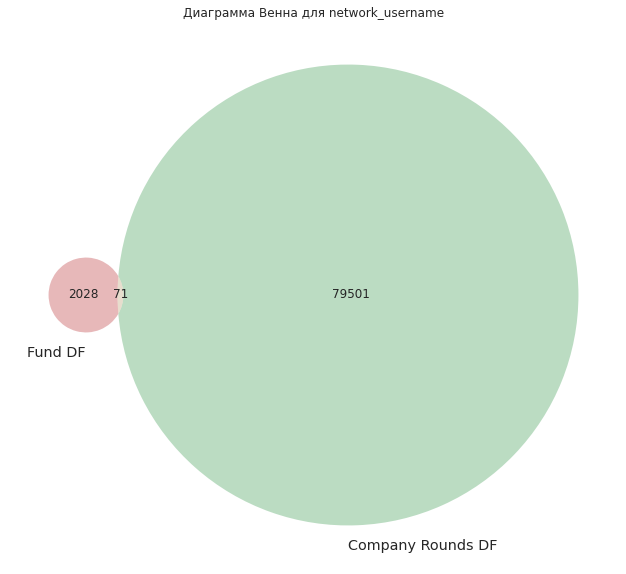

In [32]:
# Для построения диаграммы Венна преобразуем столбцы network_username в множества
set_fund = set(fund_df['network_username'])
set_company2 = set(company_and_rounds_df['network_username'])

# Создаем диаграмму Венна
plt.figure(figsize=(16, 10))
venn2([set_fund, set_company2], ('Fund DF', 'Company Rounds DF'))

# Отображаем диаграмму
plt.title("Диаграмма Венна для network_username")
plt.show()

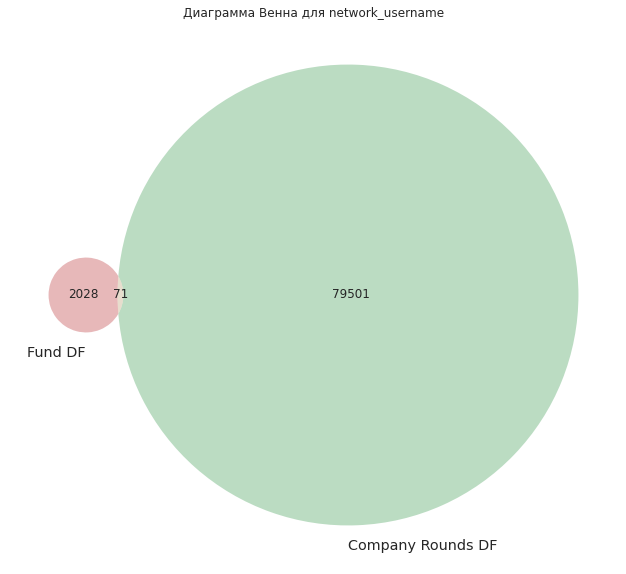

In [33]:
# Для построения диаграммы Венна преобразуем столбцы network_username в множества
set_fund = set(fund_df['network_username'])
set_company2 = set(company_and_rounds_df['network_username'])

# Создаем диаграмму Венна
plt.figure(figsize=(16, 10))
venn2([set_fund, set_company2], ('Fund DF', 'Company Rounds DF'))

# Отображаем диаграмму
plt.title("Диаграмма Венна для network_username")
plt.show()

Вывод:
Построив диаграммы Венна на основе столбца network_username для датафреймов (people_df и company_and_rounds_df) и (fund_df и company_and_rounds_df) можно сделать вывод, что количество пересечений менее 1% для обоих диаграмм. Соединение по столбцу network_username не даст нам значимого количества информации. Данные слабо связаны.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

Вероятнее всего ранее были объединены два датасета в один. Для удобства дальнейшего анализа разделим датасет на два. Изучив данные датасета company_and_rounds можно прийти к выводу, что второй датасет начинается со столбца funding_round_id — идентификатора этапа финансирования (все последующие значения меньше, чем в предыдущих столбцах). По этому столбцу и проведем разделение. Далее очистим от дубликатов датасет с компаниями.

In [34]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [35]:
# Создаем новый датафрейм с первыми столбцами
company_df = company_and_rounds_df.iloc[:, :13]

# Создаем второй датафрейм со всеми остальными столбцами
rounds_df = company_and_rounds_df.iloc[:, 13:]

In [36]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [37]:
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id2          52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funded_year          52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 16.6+ MB


In [38]:
# Посмотрим количество пропусков в полученном датафреме company_df
company_df.isna().sum()

company_id              302
name                    302
category_code         73888
status                  302
founded_at           107818
closed_at            214325
domain                70615
network_username     122240
country_code         109167
investment_rounds       302
funding_rounds          302
funding_total           302
milestones              302
dtype: int64

In [39]:
# Выведем количество пропусков в кажом столбце датафрейма company_df в относительных значениях
company_df.isna().sum() / len(company_df) * 100

company_id            0.138676
name                  0.138676
category_code        33.928752
status                0.138676
founded_at           49.509124
closed_at            98.416248
domain               32.425818
network_username     56.131586
country_code         50.128574
investment_rounds     0.138676
funding_rounds        0.138676
funding_total         0.138676
milestones            0.138676
dtype: float64

In [40]:
# Посмотрим количество пропусков в полученном датафреме rounds_df
rounds_df.isna().sum()

funding_round_id       164846
company_id2            164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
funded_year            165094
dtype: int64

In [41]:
# Выведем количество пропусков в кажом столбце датафрейма rounds_df в относительных значениях
rounds_df.isna().sum() / len(company_df) * 100

funding_round_id       75.695905
company_id2            75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
funded_year            75.809784
dtype: float64

In [42]:
company_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0


In [43]:
# Проверяем, есть ли в датафрейме дубликаты
company_df.duplicated().sum()

21220

In [44]:
# Выведем количество строк в датафрейме до удаления явных дубликатов
initial_row_count = company_df.shape[0]
print(f'Количество строк до удаления дубликатов: {initial_row_count}')

# Удалим дублирующиеся строки
company_df_cleaned = company_df.drop_duplicates()

# Выведем количество строк в датафрейме после удаления явных дубликатов
final_row_count = company_df_cleaned.shape[0]
print(f'Количество строк после удаления дубликатов: {final_row_count}')

Количество строк до удаления дубликатов: 217774
Количество строк после удаления дубликатов: 196554


In [45]:
# Посчитаем абсолютное и относительное значение удаленных строк в сравнении с исходным датафреймом
deleted_rows_count = len(company_df) - len(company_df_cleaned)
deleted_rows_percentage = (len(company_df) - len(company_df_cleaned)) / len(company_df) * 100

# Выведем результат
print("Количество удалённых строк: ", deleted_rows_count)
print("Относительное количество удалённых строк (%): ", deleted_rows_percentage)

Количество удалённых строк:  21220
Относительное количество удалённых строк (%):  9.744046580399864


Для дальнейшего анализа очистим данные полученного датафрейма company_df от пропусков в столбце company_id (13% - существенное количество) и приведем тип данных столба к целочисленному. Также сбросим индекс и отсортируем по company_id

In [46]:
# Исключим данные с пропусками по столбцу company_id
company_df_cleaned = company_df_cleaned[company_df_cleaned['company_id'].notnull()]

# Преобразование типа данных столбца 'company_id' в int64
company_df_cleaned['company_id'] = company_df_cleaned['company_id'].astype('int64')

# Сортировка строк по 'company_id'
company_df_cleaned = company_df_cleaned.sort_values(by='company_id')

# Сброс индекса
company_df_cleaned = company_df_cleaned.reset_index(drop=True)

# Вывод результата
company_df_cleaned.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0
1,2,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0.0,0.0,0.000000e+00,0.0
2,3,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0.0,0.0,0.000000e+00,5.0
3,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0
4,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0



## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [47]:
# Фильтрация данных
filt_company_df = company_df_cleaned[
    (company_df_cleaned['funding_rounds'] > 0) | (company_df_cleaned['investment_rounds'] > 0) |
    (company_df_cleaned['status'] == 'acquired')
]

# Вывод результата
display(filt_company_df)


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0
3,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0
4,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0
5,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0.0,1.0,8.000000e+05,4.0
6,8,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0.0,0.0,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196527,286183,Wedding Spot,web,operating,2013-05-01,NaT,wedding-spot.com,weddingspot,USA,0.0,1.0,2.250000e+05,0.0
196528,286184,Seldar Pharma,biotech,operating,NaT,NaT,NaN,NaN,USA,0.0,1.0,1.299900e+07,0.0
196529,286186,Micromidas,cleantech,operating,NaT,NaT,micromidas.com,NaN,USA,0.0,1.0,2.156060e+06,0.0
196538,286200,STWA,other,operating,1998-01-01,NaT,stwa.com,NaN,USA,0.0,1.0,1.588120e+06,0.0


Отфильтровав данные по заданным условиям получили датафрейм с 40747 строками. Далее будем использовать датафрейм filt_company_df.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [48]:
# Задаём параметр отображения, который позволит вывести нормальные числовые значения без экспоненциального представления
pd.set_option('display.float_format', '{:.2f}'.format)

In [49]:
# Посмотрим краткое статистическое описание данных для столбца funding_total
filt_company_df['funding_total'].describe()

count        40747.00
mean      10135609.64
std       56464359.98
min              0.00
25%              0.00
50%         600000.00
75%        5650650.00
max     5700000000.00
Name: funding_total, dtype: float64

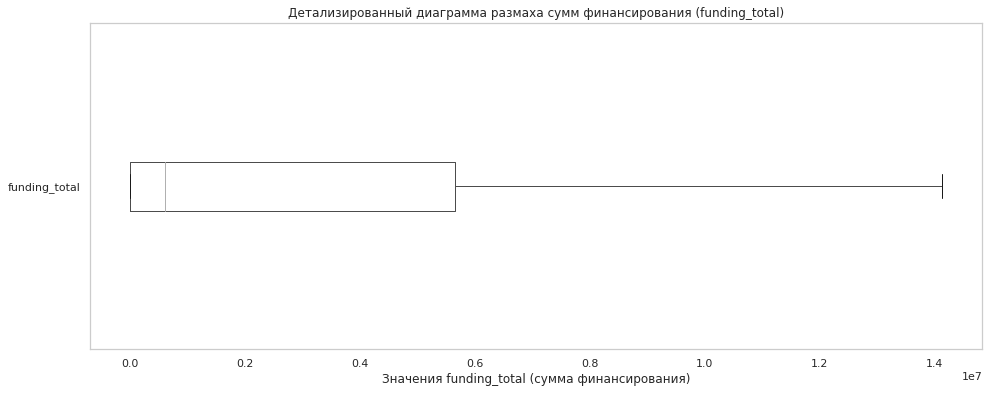

In [50]:
# Строим диаграмму размаха методом boxplot() для столбца funding_total без выбросов
boxplot = filt_company_df.boxplot(column='funding_total',
                     grid=False,
                     vert=False,
                     showfliers=False,
                     figsize=(16, 6))
boxplot.set_title('Детализированный диаграмма размаха сумм финансирования (funding_total)')
boxplot.set_xlabel('Значения funding_total (сумма финансирования)')
plt.show() 

Вывод:
Исходя из полученных данных типичным размером общего финансирования для одной компании будет сумма в пределах среднего значения (около 10 млн), а также медианы (600 тыс.), но с учётом большого стандартного отклонения, можно предположить, что значительное число компаний имеет суммы финансирования как намного меньше, так и намного больше этих значений. Выбивающимся размером финансирования будут суммы близкие к максимальной (5.7 млрд), так как они значительно превышают остальные показатели.

Для анализа данных с таким большим разбросом значений и наличием выбросов (максимальное значение финансирования значительно превышает остальные) обычные способы нахождения типичных значений, такие как среднее (mean) и медиана (median), могут быть не совсем показательными. В таких случаях рекомендуется использовать дополнительные методы анализа, чтобы получить более точную картину распределения данных.

In [51]:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Для исследования проданных компаний нам понадобится датафрейм acquisition_df с данными о покупках одними компаниями других компаний. Присоединим его к ранее полученному датафрейму filt_company_df. Присоединение будем делать по столбцу acquired_company_id — идентификатор покупаемой компании, поскольку нас интересуют проданные компании.

In [52]:
company_n_acquisition_df = pd.merge(filt_company_df, acquisition_df, left_on = 'company_id', right_on = 'acquired_company_id', how = 'left')
company_n_acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  int64         
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  id              

In [53]:
# Проверим на наличие дубликатов объединенный датафрейм по столбцу company_id
duplicates = company_n_acquisition_df.duplicated(subset=['company_id'], keep=False)

# Выведем общее количество дубликатов
print("Количество дубликатов:", sum(duplicates))

Количество дубликатов: 270


Проверим датафрейм acquisition_df на полные дубликаты и посмотрим с чем может быть связано появление дубликатов по столбцу acquired_company_id

In [54]:
acquisition_df.duplicated().sum()

0

In [55]:
# Находим дублирующиеся строки по столбцу 'acquired_company_id'
duplicates2 = acquisition_df[acquisition_df.duplicated('acquired_company_id', keep=False)]

# Сортируем дубликаты по 'acquired_company_id' в порядке возрастания
sorted_duplicates = duplicates2.sort_values(by='acquired_company_id')

# Выводим первые несколько строк с дубликатами
display(sorted_duplicates.head(20))

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
5438,5984,13,13,NaN,29000000,2009-04-01
3845,4283,20,13,NaN,0,2007-05-30
5284,5806,20,62,NaN,2600000000,2005-09-12
5003,5504,1242,62,cash,8500000000,2011-05-10
4954,5451,29,75,cash,0,2005-12-01
7761,8668,74819,75,NaN,0,2011-04-27
4610,5073,475,130,NaN,0,2011-01-31
8083,9040,234881,130,NaN,0,2012-12-12
5412,5955,5602,142,NaN,10000000,2010-06-17
164,213,351,142,cash,850000000,2008-03-13


Дубликаты появились при соеднинени двух датафреймов. Дубликаты находились в датафрейме acquisition_df. Проверив, с чем связаны дубликаты убедились, что некоторые компании были проданы дважды (id компаний покупателей и даты сделок разные). Исходя из этого удалять дубликаты по столбцу company_id не имеет смысла

In [57]:
acquired_company_df['funding_total'].describe()

count         1618.00
mean      18152961.94
std      144503027.47
min           3750.00
25%        2000000.00
50%        6000000.00
75%       15500000.00
max     5700000000.00
Name: funding_total, dtype: float64

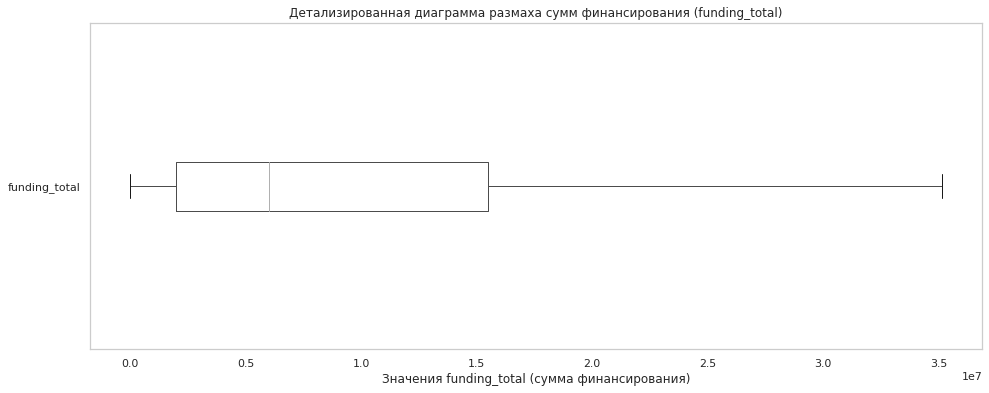

In [58]:
# Строим диаграмму размаха методом boxplot() для столбца funding_total без выбросов
boxplot = acquired_company_df.boxplot(column='funding_total',
                     grid=False,
                     vert=False,
                     showfliers=False,
                     figsize=(16, 6))
boxplot.set_title('Детализированная диаграмма размаха сумм финансирования (funding_total)')
boxplot.set_xlabel('Значения funding_total (сумма финансирования)')
plt.show() 

In [59]:
# Рассчитываем квантили
q3 = acquired_company_df['funding_total'].quantile(0.75)
q1 = acquired_company_df['funding_total'].quantile(0.25)
iqr = q3 - q1

# Определяем коэффициенты для границ выбросов
k_upper = 1.5
k_lower = 1.5

# Расчёт границ выбросов
upper_bound = q3 + k_upper * iqr
lower_bound = q1 - k_lower * iqr

In [60]:
print("Q3 — третий квартиль: ", q3)
print("Q1 — первый квартиль: ", q1)
print("Межквартильный размах (IQR): ", iqr)
print("Верхняя граница выбросов (Upper Bound): ", upper_bound)
print("Нижняя граница выбросов (Lower Bound): ", lower_bound)

Q3 — третий квартиль:  15500000.0
Q1 — первый квартиль:  2000000.0
Межквартильный размах (IQR):  13500000.0
Верхняя граница выбросов (Upper Bound):  35750000.0
Нижняя граница выбросов (Lower Bound):  -18250000.0


In [61]:
# Найдем значение процентиля, которое наиболее соответствует верхней границе выбросов 
acquired_company_df['funding_total'].describe(percentiles=[0.91])

count         1618.00
mean      18152961.94
std      144503027.47
min           3750.00
50%        6000000.00
91%       35894000.00
max     5700000000.00
Name: funding_total, dtype: float64

In [62]:
# Найдем значение процентиля, которое наиболее соответствует нижней границе выбросов 
acquired_company_df['funding_total'].describe(percentiles=[0.0])

count         1618.00
mean      18152961.94
std      144503027.47
min           3750.00
0%            3750.00
50%        6000000.00
max     5700000000.00
Name: funding_total, dtype: float64

Вывод:
Замена верхней границы на значение, рассчитанное по процентилям (91-й процентиль), обоснована, так как это позволяет сохранить основную массу данных и исключить только аномально высокие значения.
Нижняя граница, рассчитанная по IQR, неприменима в данном случае и её можно заменить на минимальное значение (3750) или 0-й процентиль, который соответствует минимальному значению в наборе данных (отрицательные значения финансирования невозможны). 

Таким образом, замена границ выбросов на значения, рассчитанные по процентилям (91-й и 0-й), является корректной для верхней и нижней границы.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [63]:
# Посмотрим краткое статистическое описание данных для столбца price_amount
company_n_acquisition_df['price_amount'].describe()

count            9390.00
mean        393988145.31
std       26846244613.76
min                 0.00
25%                 0.00
50%                 0.00
75%             23625.50
max     2600000000000.00
Name: price_amount, dtype: float64

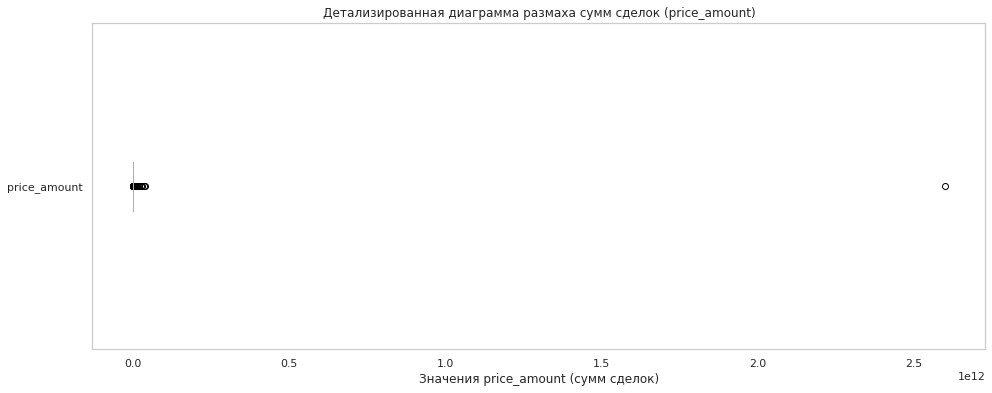

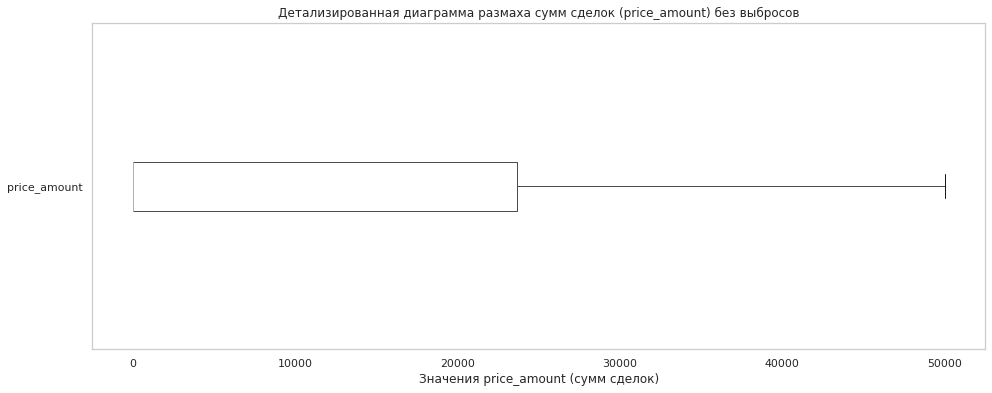

In [64]:
# Строим диаграмму размаха методом boxplot() для столбца price_amount
boxplot = company_n_acquisition_df.boxplot(column='price_amount',
                     grid=False,
                     vert=False,
                     showfliers=True,
                     figsize=(16, 6))
boxplot.set_title('Детализированная диаграмма размаха сумм сделок (price_amount)')
boxplot.set_xlabel('Значения price_amount (сумм сделок)')
plt.show() 

# Строим диаграмму размаха методом boxplot() для столбца price_amount без выбросов
boxplot = company_n_acquisition_df.boxplot(column='price_amount',
                     grid=False,
                     vert=False,
                     showfliers=False,
                     figsize=(16, 6))
boxplot.set_title('Детализированная диаграмма размаха сумм сделок (price_amount) без выбросов')
boxplot.set_xlabel('Значения price_amount (сумм сделок)')
plt.show() 

Данные сильно скошены в сторону низких значений, с большим количеством сделок, имеющих нулевую стоимость, и несколькими очень крупными сделками, которые значительно увеличивают среднее значение и стандартное отклонение.

Наличие очень крупных сделок (например, с ценой в 2.6 триллиона) указывает на то, что в данных присутствуют выбросы, которые могут искажать общую картину.

Поскольку медиана равна 0.00, это говорит о том, что большинство сделок имеют нулевую или очень низкую стоимость. В таких случаях медиана является более надежным показателем центральной тенденции, чем среднее значение.

In [65]:
# Группируем по категориям и рассчитываем среднюю цену и стандартное отклонение
category_stats = company_n_acquisition_df.groupby('category_code')['price_amount'].agg(['mean', 'std'])

# Сортируем по средней цене (наибольшие цены)
top_categories_by_mean = category_stats.sort_values(by='mean', ascending=False).head(10)

# Сортируем по стандартному отклонению (наибольший разброс цен)
top_categories_by_std = category_stats.sort_values(by='std', ascending=False).head(10)

# Объединяем результаты и сбрасываем дубликаты
top_categories = pd.concat([top_categories_by_mean, top_categories_by_std]).drop_duplicates()

display(top_categories)

,mean,std
category_code,,
enterprise,6464338116.50,128088235060.17
automotive,1528600000.00,2297757559.01
real_estate,1256142857.14,2505122913.06
public_relations,615190296.80,4059244205.05
manufacturing,589272426.66,969657968.02
nanotech,584000000.00,NaN
biotech,426312140.97,1540373521.41
health,394462962.96,1249084287.10
finance,302198750.00,796098475.78


Категории отсортированы по средней цене от наибольшей к наименьшей. Наибольшее значение средней цены у категории enterprise, а наименьшее — у other.

Стандартное отклонение показывает разброс значений относительно среднего. Категория enterprise также имеет наибольшее стандартное отклонение, что говорит о большом разбросе цен в этой категории.

Эти данные могут быть полезны для анализа рынка, определения наиболее и наименее дорогих категорий области деятельности компаний, а также для выявления тенденций и закономерностей в стоимости компаний.

Посмотрим какие статистические данные будут, если отбросить выбросы.

In [66]:
# Рассчитываем квантили
Q3 = company_n_acquisition_df['price_amount'].quantile(0.75)
Q1 = company_n_acquisition_df['price_amount'].quantile(0.25)
IQR = Q3 - Q1

# Определяем коэффициенты для границ выбросов
k_upper = 1.5
k_lower = 1.5

# Расчёт границ выбросов
upper_bound = Q3 + k_upper * IQR
lower_bound = Q1 - k_lower * IQR

In [67]:
print("Q3 — третий квартиль: ", Q3)
print("Q1 — первый квартиль: ", Q1)
print("Межквартильный размах (IQR): ", IQR)
print("Верхняя граница выбросов (Upper Bound): ", upper_bound)
print("Нижняя граница выбросов (Lower Bound): ", lower_bound)

Q3 — третий квартиль:  23625.5
Q1 — первый квартиль:  0.0
Межквартильный размах (IQR):  23625.5
Верхняя граница выбросов (Upper Bound):  59063.75
Нижняя граница выбросов (Lower Bound):  -35438.25


In [68]:
# Найдем значение процентиля, которое наиболее соответствует верхней границе выбросов 
company_n_acquisition_df['price_amount'].describe(percentiles=[0.752])

count            9390.00
mean        393988145.31
std       26846244613.76
min                 0.00
50%                 0.00
75.2%           75000.00
max     2600000000000.00
Name: price_amount, dtype: float64

In [69]:
# Удаление выбросов с использованием метода .loc
company_n_acquisition_filtered = company_n_acquisition_df.loc[
    (company_n_acquisition_df['price_amount'] >= 0) & (company_n_acquisition_df['price_amount'] <= 59063.75)
]

In [70]:
company_n_acquisition_filtered['price_amount'].describe()

count    7057.00
mean      213.43
std      2185.66
min         0.00
25%         0.00
50%         0.00
75%         0.00
max     50000.00
Name: price_amount, dtype: float64

In [71]:
# Группируем по категориям и рассчитываем среднюю цену и стандартное отклонение
category_stats = company_n_acquisition_filtered.groupby('category_code')['price_amount'].agg(['mean', 'std'])

# Сортируем по средней цене (наибольшие цены)
top_categories_by_mean = category_stats.sort_values(by='mean', ascending=False).head(10)

# Сортируем по стандартному отклонению (наибольший разброс цен)
top_categories_by_std = category_stats.sort_values(by='std', ascending=False).head(10)

# Объединяем результаты и сбрасываем дубликаты
top_categories = pd.concat([top_categories_by_mean, top_categories_by_std]).drop_duplicates()

display(top_categories)

,mean,std
category_code,,
search,943.40,6868.03
network_hosting,592.86,4707.10
games_video,197.14,3107.22
public_relations,171.23,2069.01
enterprise,67.34,1160.52
advertising,43.29,657.95
manufacturing,41.44,124.33
web,35.62,581.50
other,23.51,254.75


Исключив из выборки данные по верхней границе выбросов получили следующее: 
- Категория search имеет наибольшую среднюю цену, но также и большое стандартное отклонение, что указывает на значительный разброс цен в этой категории. 
- Категория manufacturing, напротив, имеет наименьшую среднюю цену и относительно небольшое стандартное отклонение.

Вывод:

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов можно выделить категории стартапов, характеризующиеся наибольшими типичными ценами и наибольшим разбросом цен за стартап.
Так сгруппировав данные по категориям мы отсортировали их по средней цене (от наибольшей к наименьшей), а также по стандартному отклонению (показывает разброс значений относительно среднего) мы получили следующую информацию:

- Наибольшее значение средней цены у категории enterprise, а наименьшее — у other.
- Категория enterprise также имеет наибольшее стандартное отклонение, что говорит о большом разбросе цен в этой категории.

Таким образом можно сделать вывод, что наиболее привлекательная категория для инвесторов - enterprise.


Дополнительно мы вычислили верхнюю и нижнюю границу выбросов для данных по price_amount (сумма сделки). Нижняя граница, рассчитанная по IQR, не применима в данном случае, и её можно заменить на минимальное значение (0, поскольку мы можем допустить, что некоторые сделки были бесплатными (например, в рамках партнерства или обмена активами)). Отбросив значения по верхней границе выбросов, мы получили следующие данные:

- Категория search имеет наибольшую среднюю цену, но также и большое стандартное отклонение, что указывает на значительный разброс цен в этой категории.
- Категория manufacturing, напротив, имеет наименьшую среднюю цену и относительно небольшое стандартное отклонение.

Таким образом, если ивестора интересуют более точная информация (без учета выбросов), то наиболее привлекательная категория для инвесторов - search. Но лучше уточнить у заказчика, какие данные его интересуют.



### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

Сначала изучим данные в столбце funding_rounds:
- Проверим наличие пропущенных значений.
- Изучим распределение значений.

0
count   40890.00
mean        1.29
std         1.26
min         0.00
25%         1.00
50%         1.00
75%         2.00
max        15.00
Name: funding_rounds, dtype: float64


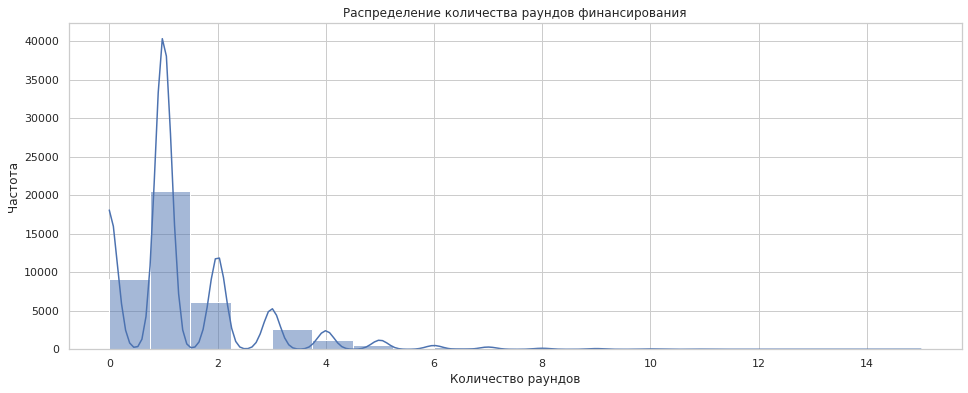

In [72]:
# Проверим наличие пропущенных значений
print(company_n_acquisition_df['funding_rounds'].isnull().sum())

# Посмотрим краткое статистическое описание данных для столбца funding_rounds
print(company_n_acquisition_df['funding_rounds'].describe())

# Построим гистограмму распределения
plt.figure(figsize=(16, 6))
sns.histplot(company_n_acquisition_df['funding_rounds'], bins=20, kde=True)
plt.title('Распределение количества раундов финансирования')
plt.xlabel('Количество раундов')
plt.ylabel('Частота')
plt.show()

Теперь сгруппируем данные по столбцу status и найдем типичное значение количества раундов финансирования для каждого статуса. В качестве типичного значения можно использовать:
- Медиану (устойчива к выбросам).
- Среднее значение (если данные распределены нормально).

In [73]:
# Сгруппируем по статусу и расчетаем медиану
typical_funding_rounds = company_n_acquisition_df.groupby('status')['funding_rounds'].median().reset_index()
typical_funding_rounds.columns = ['status', 'median_funding_rounds']

# Сгруппируем по статусу и расчетаем среднее
mean_funding_rounds = company_n_acquisition_df.groupby('status')['funding_rounds'].mean().reset_index()
mean_funding_rounds.columns = ['status', 'mean_funding_rounds']

# Объединенм результаты
typical_funding_rounds = typical_funding_rounds.merge(mean_funding_rounds, on='status')

display(typical_funding_rounds)

,status,median_funding_rounds,mean_funding_rounds
0,acquired,0.00,0.53
1,closed,1.00,1.38
2,ipo,1.00,1.93
3,operating,1.00,1.52


Для наглядности визуализирeум результаты:

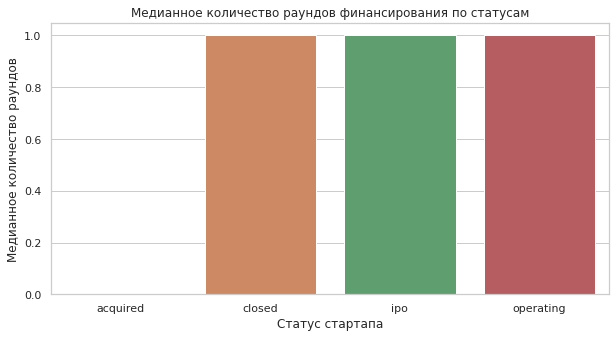

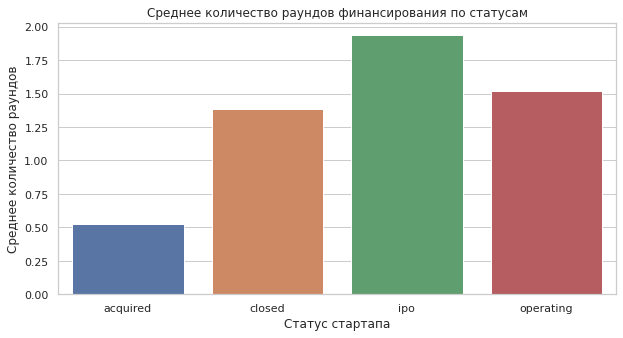

In [74]:
# График медианного количества раундов по статусам
plt.figure(figsize=(10, 5))
sns.barplot(x='status', y='median_funding_rounds', data=typical_funding_rounds)
plt.title('Медианное количество раундов финансирования по статусам')
plt.xlabel('Статус стартапа')
plt.ylabel('Медианное количество раундов')
plt.xticks(rotation=0)
plt.show()

# График среднего количества раундов по статусам
plt.figure(figsize=(10, 5))
sns.barplot(x='status', y='mean_funding_rounds', data=typical_funding_rounds)
plt.title('Среднее количество раундов финансирования по статусам')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов')
plt.xticks(rotation=0)
plt.show()

acquired (приобретенные стартапы):
Медиана: 0.00
Среднее: 0.53
У половины приобретенных стартапов не было ни одного раунда финансирования (медиана равна 0). Среднее значение (0.53) немного выше, что указывает на наличие стартапов с одним или несколькими раундами финансирования. Это может означать, что многие приобретенные стартапы либо не привлекали внешнего финансирования, либо были куплены на ранних стадиях.

closed (закрытые стартапы):
Медиана: 1.00
Среднее: 1.38
У половины закрытых стартапов был хотя бы один раунд финансирования (медиана равна 1). Среднее значение (1.38) выше медианы, что говорит о наличии стартапов, которые привлекали больше одного раунда финансирования. Это может указывать на то, что даже несколько раундов финансирования не всегда гарантируют успех.

ipo (стартапы, вышедшие на IPO):
Медиана: 1.00
Среднее: 1.93
У половины стартапов, вышедших на IPO, был хотя бы один раунд финансирования (медиана равна 1). Среднее значение (1.93) значительно выше медианы, что указывает на наличие стартапов, которые привлекали несколько раундов финансирования перед выходом на IPO. Это может свидетельствовать о том, что успешные стартапы, как правило, проходят больше раундов финансирования.

operating (действующие стартапы):
Медиана: 1.00
Среднее: 1.52
У половины действующих стартапов был хотя бы один раунд финансирования (медиана равна 1). Среднее значение (1.52) выше медианы, что говорит о наличии стартапов, которые привлекали больше одного раунда финансирования. Это может указывать на то, что действующие стартапы часто проходят несколько раундов финансирования для поддержания своей деятельности.

Выводы:
- Приобретенные стартапы чаще всего не привлекали финансирование или привлекали его минимально.

- Закрытые стартапы в среднем привлекали немного больше финансирования, чем приобретенные, но этого было недостаточно для успеха.

- Стартапы, вышедшие на IPO, привлекали больше раундов финансирования, что может быть связано с их успешным развитием.

- Действующие стартапы также привлекают несколько раундов финансирования, что может быть необходимо для их текущей деятельности.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

В ходе работы над проектом мы ознакомились с данными: загрузили и сделали первичную предобработку, осуществили смену типов и проанализировали пропуски.

Далее мы осуществили предобработку данных и предварительное исследование:
1) Раундов финансирования по годам: 
  - Составили сводную таблицу по годам. Оставили в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования. На основе получившейся таблицы построили график, который отражает динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования. 
  - Сделали выводы: 
   - Типичный размер собранных в рамках одного раунда средств был максимален в 2005 году. Наблюдается тендеция к увеличению количества раундов. 
   - В 2013 году количество раундов составило - 11072 раунда. Количество средств выделяемых в рамках каждого раунда выросло, по сравнению с показателем 2012 года. О тенденции можно будет говорить, после получения данных на 2014, 2015 года.

2) Людей и их образования:
  - Используя датасеты people.csv и education.csv, разделили все компании на несколько групп по количеству сотрудников и оценили среднюю долю сотрудников без информации об образовании в каждой из групп.
  - Проведя анализ данных сделали вывод, что полнота сведений о сотрудниках (в нашем случае, наличие данных об образовании) не зависит от размера компании. Средняя доля сотрудников без образования (отсутствие данных о дате получения образования) распределена почти равномерно - 60-70%.
  - Оценили возможность присоединения к этим таблицам ещё и таблицу degrees.csv

3) Объединения датасетов по столбцу network_username:
  - Построив диаграммы Венна на основе столбца network_username для датафреймов (people_df и company_and_rounds_df) и (fund_df и company_and_rounds_df) сделали вывод, что количество пересечений менее 1% для обоих диаграмм. Соединение по столбцу network_username не даст нам значимого количества информации. Данные слабо связаны.

4) Проблемного датасета company_and_rounds.csv:
  - Привели данные датасета company_and_rounds.csv в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Максимальным образом сохранили данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовили данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.




Провели исследовательский анализ объединённой таблицы:

1) Объединили данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Проверили полноту и корректность получившейся таблицы.

2) Провели анализ выбросов.

3) Исследовали компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования. Рассчитали аналитически верхнюю и нижнюю границу выбросов для столбца funding_total и указали, каким процентилям границы соответствуют и пришли к выводу, что замена верхней границы на значение, рассчитанное по процентилям (91-й процентиль), обоснована, так как это позволяет сохранить основную массу данных и исключить только аномально высокие значения. Нижняя граница, рассчитанная по IQR, не применима в данном случае, и её можно заменить на минимальное значение (3750) или 1-й процентиль, если это имеет смысл в контексте задачи (отрицательные значения финансирования невозможны). Таким образом, замена границ выбросов на значения, рассчитанные по процентилям, является корректной для верхней границы, но требует пересмотра для нижней границы.

4) Изучили цены стартапов по категориям и пришли к выводу, что категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов можно выделить категории стартапов, характеризующиеся наибольшими типичными ценами и наибольшим разбросом цен за стартап. Так сгруппировав данные по категориям мы отсортировали их по средней цене (от наибольшей к наименьшей), а также по стандартному отклонению (показывает разброс значений относительно среднего) мы получили следующую информацию:
  - Наибольшее значение средней цены у категории enterprise, а наименьшее — у other.
  - Категория enterprise также имеет наибольшее стандартное отклонение, что говорит о большом разбросе цен в этой категории.

Таким образом можно сделать вывод, что наиболее привлекательная категория для инвесторов - enterprise.


5) Выяснили сколько раундов продержится стартап перед покупкой:
 - Приобретенные стартапы чаще всего не привлекали финансирование или привлекали его минимально.
 - Закрытые стартапы в среднем привлекали немного больше финансирования, чем приобретенные, но этого было недостаточно для успеха.
 - Стартапы, вышедшие на IPO, привлекали больше раундов финансирования, что может быть связано с их успешным развитием.
 - Действующие стартапы также привлекают несколько раундов финансирования, что может быть необходимо для их текущей деятельности.



Представленные данные позволяют ответить на вопросы заказчика, но требуют уточнения более четких критериев.